In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Clone model và cài đặt các requirements

In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/ultralytics/yolov5
%cd /content/drive/MyDrive/yolov5
!pip install -qr requirements.txt

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [ ]:
import torch
from drive.MyDrive.yolov5 import utils
display = utils.notebook_init()  # checks


YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/107.7 GB disk)


Prepare data

In [ ]:
%cd /content/drive/MyDrive/yolov5/data
!unzip /content/drive/MyDrive/datasets/dataset.zip

/content/drive/MyDrive/yolov5/data
Archive:  /content/drive/MyDrive/datasets/dataset.zip
  inflating: classes.txt             
  inflating: custom-data.yaml        
  inflating: images/004bc4a1-IMG_0945.jpg  
  inflating: images/00bedb82-a37ca64d6508cf5696198.jpg  
  inflating: images/01638e65-IMG_0976.jpg  
  inflating: images/018a1390-5698fc83e8c5429b1bd43.jpg  
  inflating: images/05291a7f-Screenshot_2024-01-19_222311.png  
  inflating: images/05af32e5-IMG20240121173430_BURST000_COVER_05840633.jpg  
  inflating: images/05e26c94-31.jpg  
  inflating: images/075d7ae4-IMG_1087.jpg  
  inflating: images/07db1d1f-IMG20240121173631_BURST001_05840831.jpg  
  inflating: images/0865ddc8-IMG_0988.jpg  
  inflating: images/0953172b-IMG_1065.jpg  
  inflating: images/09a0e051-Screenshot_2024-01-21_200729.png  
  inflating: images/0a2d9cb4-5f97687e7b38d16688294.jpg  
  inflating: images/0a30b891-30.jpg  
  inflating: images/0b2c03cd-Screenshot_2024-01-21_200838.png  
  inflating: images/0b96cd87

In [ ]:
import os
import shutil

# Đường dẫn đến thư mục chứa file image và label
image_dir = '/content/drive/MyDrive/yolov5/data/images'
label_dir = '/content/drive/MyDrive/yolov5/data/labels'

# Tạo thư mục train và val
train_image = '/content/drive/MyDrive/yolov5/data/train/images'
val_image = '/content/drive/MyDrive/yolov5/data/val/images'
train_label = '/content/drive/MyDrive/yolov5/data/train/labels'
val_label = '/content/drive/MyDrive/yolov5/data/val/labels'
os.makedirs(train_image, exist_ok=True)
os.makedirs(val_image, exist_ok=True)
os.makedirs(train_label, exist_ok=True)
os.makedirs(val_label, exist_ok=True)
# Lấy danh sách các file image và label
image_files = os.listdir(image_dir)
label_files = os.listdir(label_dir)

# Chia tỷ lệ train/val
train_ratio = 0.8
num_train = int(len(image_files) * train_ratio)

# Di chuyển file image vào thư mục train và val
for i, image_file in enumerate(image_files):
    if i < num_train:
        shutil.move(os.path.join(image_dir, image_file), os.path.join(train_image, image_file))
    else:
        shutil.move(os.path.join(image_dir, image_file), os.path.join(val_image, image_file))

# Di chuyển file label vào thư mục train và val
for i, label_file in enumerate(label_files):
    if i < num_train:
        shutil.move(os.path.join(label_dir, label_file), os.path.join(train_label, label_file))
    else:
        shutil.move(os.path.join(label_dir, label_file), os.path.join(val_label, label_file))

Train

In [ ]:
!python /content/drive/MyDrive/yolov5/train.py \
        --img 416 \
        --batch 16 \
        --epochs 100 \
        --data custom-data.yaml \
        --weights yolov5s.pt \
        --resume /content/drive/MyDrive/yolov5/runs/train/exp2/weights/last.pt

2024-01-24 10:43:39.003725: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 10:43:39.003780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 10:43:39.005668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=custom-data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=/content/drive/MyDrive/yolov5/runs/train/exp2/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_we

Detect

In [ ]:
!python /content/drive/MyDrive/yolov5/detect.py \
        --data /content/drive/MyDrive/yolov5/data/custom-data.yaml\
        --source /content/drive/MyDrive/datasets/test_1.png \
        --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt \
        --conf 0.25 \
        --save-txt \
        --save-conf

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/datasets/test_1.png, data=/content/drive/MyDrive/yolov5/data/custom-data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7244764 parameters, 0 gradients, 16.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/datasets/test_1.png: 640x640 1 Cam do xe, 1 Cam xe hoi, 1 Cam xe tho so, 2 Di vao dung lan duongs, 1 Toc do toi da: 50, 12.4ms
Speed: 0.6ms pre-process, 12.4ms inference

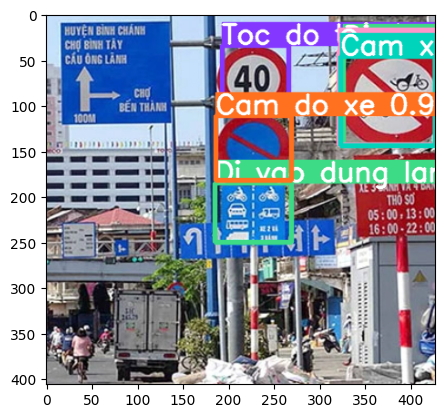

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread("/content/drive/MyDrive/yolov5/runs/detect/exp/test_1.png")

plt.imshow(img)


Evaluate

In [ ]:
!python /content/drive/MyDrive/yolov5/val.py \
        --data /content/drive/MyDrive/yolov5/data/custom-data.yaml\
        --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt \
        --verbose

val: data=/content/drive/MyDrive/yolov5/data/custom-data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7244764 parameters, 0 gradients, 16.5 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5/data/val/labels.cache... 90 images, 2 backgrounds, 0 corrupt: 100% 92/92 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5/data/val/images/d3ff6834-IMG20240121181628.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5/data/val/images/d4f90c78-IMG20240121175127_BURST007_05841179.jpg: corrupt JPEG restored and s

In [ ]:
!python /content/drive/MyDrive/yolov5/val.py \
        --data /content/drive/MyDrive/yolov5/data/custom-data.yaml \
        --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt

val: data=/content/drive/MyDrive/yolov5/data/custom-data.yaml, weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-278-g050c72c Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7244764 parameters, 0 gradients, 16.5 GFLOPs
val: Scanning /content/drive/MyDrive/yolov5/data/val/labels.cache... 90 images, 2 backgrounds, 0 corrupt: 100% 92/92 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov5/data/val/images/d3ff6834-IMG20240121181628.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/yolov5/data/val/images/d4f90c78-IMG20240121175127_BURST007_05841179.jpg: corrupt JPEG restored and 